Shibu Mohapatra

MSC CS Artificial Intelligence

**Program to solve XOR Problem. Solution to XOR in (MLP) Multi-Layer Perceptron.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_x = 2 # number of neurons in input layer
n_h = 8 # number of neurons in hidden layer
n_y = 1 # number of neurons in output layer

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
y = np.array([0, 1, 1, 0])
print(X.shape)
print(y.shape)

(2, 4)
(4,)


In [2]:
print(X)
print(y)

[[0 0 1 1]
 [0 1 0 1]]
[0 1 1 0]


In [3]:
def forward_prop(X, y, params):
  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']

  m = X.shape[0]

  Z1 = np.dot(W1, X) + b1
  A1 = np.maximum(0, Z1)

  Z2 = np.dot(W2, A1) + b2
  A2 = 1/(1 + np.exp(-Z2))

  loss = (-1 / m) * np.sum(y * np.log(A2) + (1-y) * np.log(1-A2))

  return Z1, A1, Z2, A2, loss

In [4]:
def backward_prop(X, y, params):

  W1 = params['W1']
  b1 = params['b1']
  W2 = params['W2']
  b2 = params['b2']

  Z1, A1, Z2, A2, loss = forward_prop(X, y, params)

  dloss_A2 = - (np.divide(y, A2) - np.divide(1 - y, 1 - A2)) 
  dloss_Z2 = dloss_A2 * (A2 * (1 - A2))
  dloss_A1 = np.dot(W2.T, dloss_Z2)
  dloss_W2 = (1/A1.shape[1]) * np.dot(dloss_Z2, A1.T)
  dloss_b2 = (1/A1.shape[1]) * np.dot(dloss_Z2, np.ones([dloss_Z2.shape[1],1]))

  dloss_Z1 = dloss_A1 * ((Z1 >= 0) * 1)
  dloss_A0 = np.dot(W1.T, dloss_Z1)
  dloss_W1 = (1/X.shape[1]) * np.dot(dloss_Z1, X.T)
  dloss_b1 = (1/X.shape[1]) * np.dot(dloss_Z1, np.ones([dloss_Z1.shape[1],1]))

  grads = {}
  grads['dloss_W1'] = dloss_W1
  grads['dloss_b1'] = dloss_b1
  grads['dloss_W2'] = dloss_W2
  grads['dloss_b2'] = dloss_b2

  return grads, loss

In [5]:
def train_nn(X, y, learning_rate = 0.01, epochs = 250):

  np.random.seed(1)
  W1 = np.random.rand(n_h, n_x)
  b1 = np.zeros((n_h, 1))

  W2 = np.random.randn(n_y, n_h)
  b2 = np.zeros((n_y, 1))
  params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

  losses = []
  lst_w1 = []
  for epoch in range(epochs):
    grads, loss = backward_prop(X, y, params)
    losses.append(loss)

    params['W1'] = params['W1'] - learning_rate * grads['dloss_W1']
    params['b1'] = params['b1'] - learning_rate * grads['dloss_b1']
    params['W2'] = params['W2'] - learning_rate * grads['dloss_W2']
    params['b2'] = params['b2'] - learning_rate * grads['dloss_b2']

  return params, losses

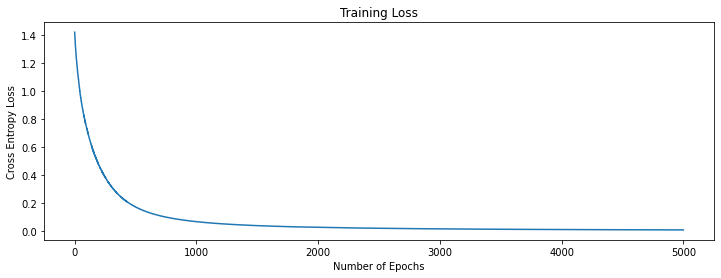

Ground Truth: [0 1 1 0]
Predictions: [0 1 1 0]
Prediction Probabilities: [0.01184645 0.9978798  0.9978594  0.00148388]
Loss: 0.008833749991272684


In [6]:
params, losses = train_nn(X, y, learning_rate = 0.1, epochs = 5000)
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(losses)
ax.set_title('Training Loss')
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Cross Entropy Loss')
plt.show()
_, _, _, preds, loss = forward_prop(X, y, params)
print('Ground Truth:', y)
print('Predictions:', (preds.reshape(-1) >= 0.5) * 1)
print('Prediction Probabilities:', preds.reshape(-1))
print('Loss:', loss)